<h2>Имопртируем и просматриваем данные</h2>

In [143]:
import pandas as pd
import numpy as np


data = pd.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Проыеряем, есть лм в датасете дубликаты</h2>

In [144]:
data.duplicated().sum()

0

<h2>Сохраняем все столбцы в списке для дальнейшего анализа, чтобы было удобнее просматривать все столбцы</h2>

In [145]:
columns = data.columns
columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

<h2>Проверяем каждый столбец на наличие пустых ячеек. Здесь используется список столбцов из предыдущего этапа, так как обычная запись data.isna().sum() не показывала все столбцы</h2>

In [146]:
for col in columns:
    if data[col].isna().sum() > 0:
        print(f"{col}: {data[col].isna().sum()}")

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


<h2>Убираем столбцы, в которых почти все строки пустые, так как в данных не должно быть пустот, а тут их сликом много. Значит, эти столбцы не нужны</h2>

In [147]:
data = data.drop(columns=['PoolQC', 'MiscFeature', 'Alley'])

<h2>Заполняем все пропуски значениями. Значения были взяты из описания столбцов</h2>

In [148]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [149]:
data['MasVnrType'] = data['MasVnrType'].fillna('No data')

In [150]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

<h2>Избавляемся от строк с пустыми значениями. Оказалось, что все столбцы, которые содержат в названии bsmt связаные. Если в одном пустота, то и в других тоже. Поэтому избалвемся от пустых строк, удаляя их</h2>

In [151]:
data = data[data['BsmtQual'].isna() == False]

In [152]:
data = data[data['BsmtExposure'].isna() == False]

In [153]:
data = data[data['BsmtFinType2'].isna() == False]

In [154]:
data = data[data['Electrical'].isna() == False]

<h2>продолжаем заполнение пустых ячеек данными из описания столбцов</h2>

In [155]:
data['FireplaceQu'] = data['FireplaceQu'].fillna("No Fireplace")

In [156]:
data['GarageType'] = data['GarageType'].fillna("No Garage")

In [157]:
data = data[data["GarageYrBlt"].isna() == False]

In [158]:
data['Fence'] = data['Fence'].fillna('No fence')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
for col in columns:
    try:
        if data[col].isna().sum() > 0:
            print(f"{col}: {data[col].isna().sum()}")
    except:
        pass

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuil

<h2>Проверяем, чтобы вдркг не появились дубликаты</h2>

In [161]:
data.duplicated().sum()

0

<h2>Удаляем столбец с идентификаторами, так как они не влияют на результат</h2>

In [162]:
data = data.drop(columns=['Id'])

<h2>Создаем список с названиями численных столбцов</h2>

In [163]:
numerics = data.select_dtypes(include=np.number).columns.tolist()
numerics

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<h2>Создаем список с категориальными столбцами</h2>

In [164]:
categorials = data.select_dtypes(object).columns.to_list()
categorials

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

<h2>Нарисуем график для каждого численного столбца и посмотрим на распределение значений</h2>

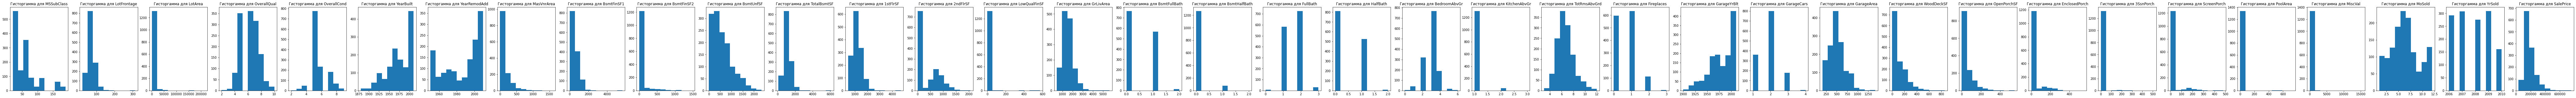

In [165]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, len(numerics), figsize=(150, 5))
for i in range(len(numerics)):
    ax[i].set_title(f'Гисторгамма для {numerics[i]}')
    ax[i].hist(data[numerics[i]])
plt.show()

<h2>Подчищаем данные, так как есть значения, которые встречаются очень редко и мало</h2>

In [166]:
data = data[data['LotFrontage'] < 250][data['LotArea'] < 150000][data['1stFlrSF'] < 4000][data['LowQualFinSF'] < 200][data['3SsnPorch'] < 100][data['ScreenPorch'] < 350][data['PoolArea'] < 400]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_l

<h2>Посмотрим на корреляцию численных столбцов. Выявим закономерности</h2>

In [167]:
import seaborn as sns

numerics.pop()

corr_data = data.drop(columns=['SalePrice'])


corr_digit = corr_data[numerics].corr()
corr_digit

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.403782,-0.264078,0.048632,-0.094617,0.057076,0.041045,0.035312,-0.081929,-0.078872,-0.140850,-0.290346,-0.276056,0.309968,0.060306,0.064950,-0.021311,-0.002525,0.110773,0.204484,-0.070543,0.234865,0.009091,-0.036942,0.081816,0.007416,-0.071126,-0.029175,-0.004960,-0.029635,0.009877,-0.027325,NaN,-0.025032,-0.020997,-0.017688
LotFrontage,-0.403782,1.000000,0.343245,0.207366,-0.039570,0.114133,0.068156,0.171433,0.130326,0.038955,0.139160,0.326262,0.352246,0.045660,-0.057591,0.305617,0.057088,-0.009372,0.167470,0.034497,0.258225,0.014917,0.307376,0.205484,0.074248,0.292713,0.321530,0.085640,0.146168,-0.004086,0.019086,0.039562,NaN,0.001279,0.029035,0.015903
LotArea,-0.264078,0.343245,1.000000,0.127730,-0.025896,0.008266,0.014489,0.131443,0.207582,0.068089,0.025538,0.295578,0.341440,0.072065,-0.038262,0.320947,0.130758,0.017154,0.138816,0.048740,0.162763,0.007897,0.249422,0.283041,-0.008327,0.212301,0.250593,0.226592,0.128361,-0.008832,-0.003708,0.074753,NaN,0.028277,-0.004539,-0.027709
OverallQual,0.048632,0.207366,0.127730,1.000000,-0.165459,0.582752,0.554737,0.399727,0.176265,-0.089117,0.301181,0.510448,0.474401,0.268889,-0.012878,0.594978,0.074855,-0.074314,0.576348,0.252871,0.073640,-0.135890,0.440016,0.365031,0.554867,0.593771,0.529098,0.228435,0.317366,-0.129994,-0.025863,0.022745,NaN,-0.029188,0.067845,-0.011233
OverallCond,-0.094617,-0.039570,-0.025896,-0.165459,1.000000,-0.419862,0.028765,-0.140466,-0.053450,0.040274,-0.170254,-0.240285,-0.161528,0.014995,-0.002581,-0.108915,-0.059695,0.126003,-0.226009,-0.075784,0.012381,-0.079650,-0.073714,-0.039171,-0.343954,-0.258359,-0.210284,-0.023117,-0.078862,0.085961,0.057535,0.045404,NaN,0.079288,-0.023129,0.061591
YearBuilt,0.057076,0.114133,0.008266,0.582752,-0.419862,1.000000,0.622652,0.290407,0.219405,-0.070827,0.155947,0.399644,0.269370,0.015705,-0.036337,0.216909,0.172132,-0.058501,0.494543,0.234749,-0.067267,-0.182841,0.120681,0.116526,0.834881,0.534924,0.460307,0.214645,0.244516,-0.396691,-0.000915,-0.063780,NaN,-0.032417,0.003534,-0.012290
YearRemodAdd,0.041045,0.068156,0.014489,0.554737,0.028765,0.622652,1.000000,0.159152,0.090486,-0.089374,0.181774,0.274546,0.239932,0.120937,0.010216,0.287890,0.096553,-0.039091,0.459659,0.172134,-0.076977,-0.158683,0.178109,0.091061,0.650035,0.464782,0.391780,0.205225,0.254767,-0.232104,0.023998,-0.047488,NaN,0.003052,0.009417,0.034512
MasVnrArea,0.035312,0.171433,0.131443,0.399727,-0.140466,0.290407,0.159152,1.000000,0.235525,-0.081464,0.107328,0.357206,0.335355,0.170454,-0.035441,0.402968,0.071660,0.010425,0.271391,0.190515,0.113459,-0.007302,0.297680,0.225934,0.244224,0.367464,0.364642,0.156181,0.125456,-0.111524,-0.019905,0.047559,NaN,-0.029668,-0.006764,0.001052
BsmtFinSF1,-0.081929,0.130326,0.207582,0.176265,-0.053450,0.219405,0.090486,0.235525,1.000000,-0.076272,-0.576619,0.440057,0.402382,-0.186666,-0.028062,0.139460,0.647810,0.043236,0.029131,-0.032048,-0.127508,-0.027712,0.021569,0.217251,0.142544,0.202605,0.255803,0.194427,0.096332,-0.115557,0.004464,0.053565,NaN,0.004931,-0.018404,0.020531
BsmtFinSF2,-0.078872,0.038955,0.068089,-0.089117,0.040274,-0.070827,-0.089374,-0.081464,-0.076272,1.000000,-0.227779,0.082818,0.095477,-0.111394,-0.017491,-0.026104,0.141718,0.079573,-0.097171,-0.038256,-0.013965,-0.029084,-0.049497,0.029693,-0.092859,-0.084660,-0.055480,0.067889,0.010907,0.043518,-0.009824,0.092456,NaN,-0.000300,-0.016455,0.032011


<h2>Здесь видно, что между многими столбцами есть сильные зависимости. Если прглядеться, то столбцы, содержащие год, зависят больше всего друг от друга и больше ни от чего. Также столбец PoolArea везде пустой.</h2>

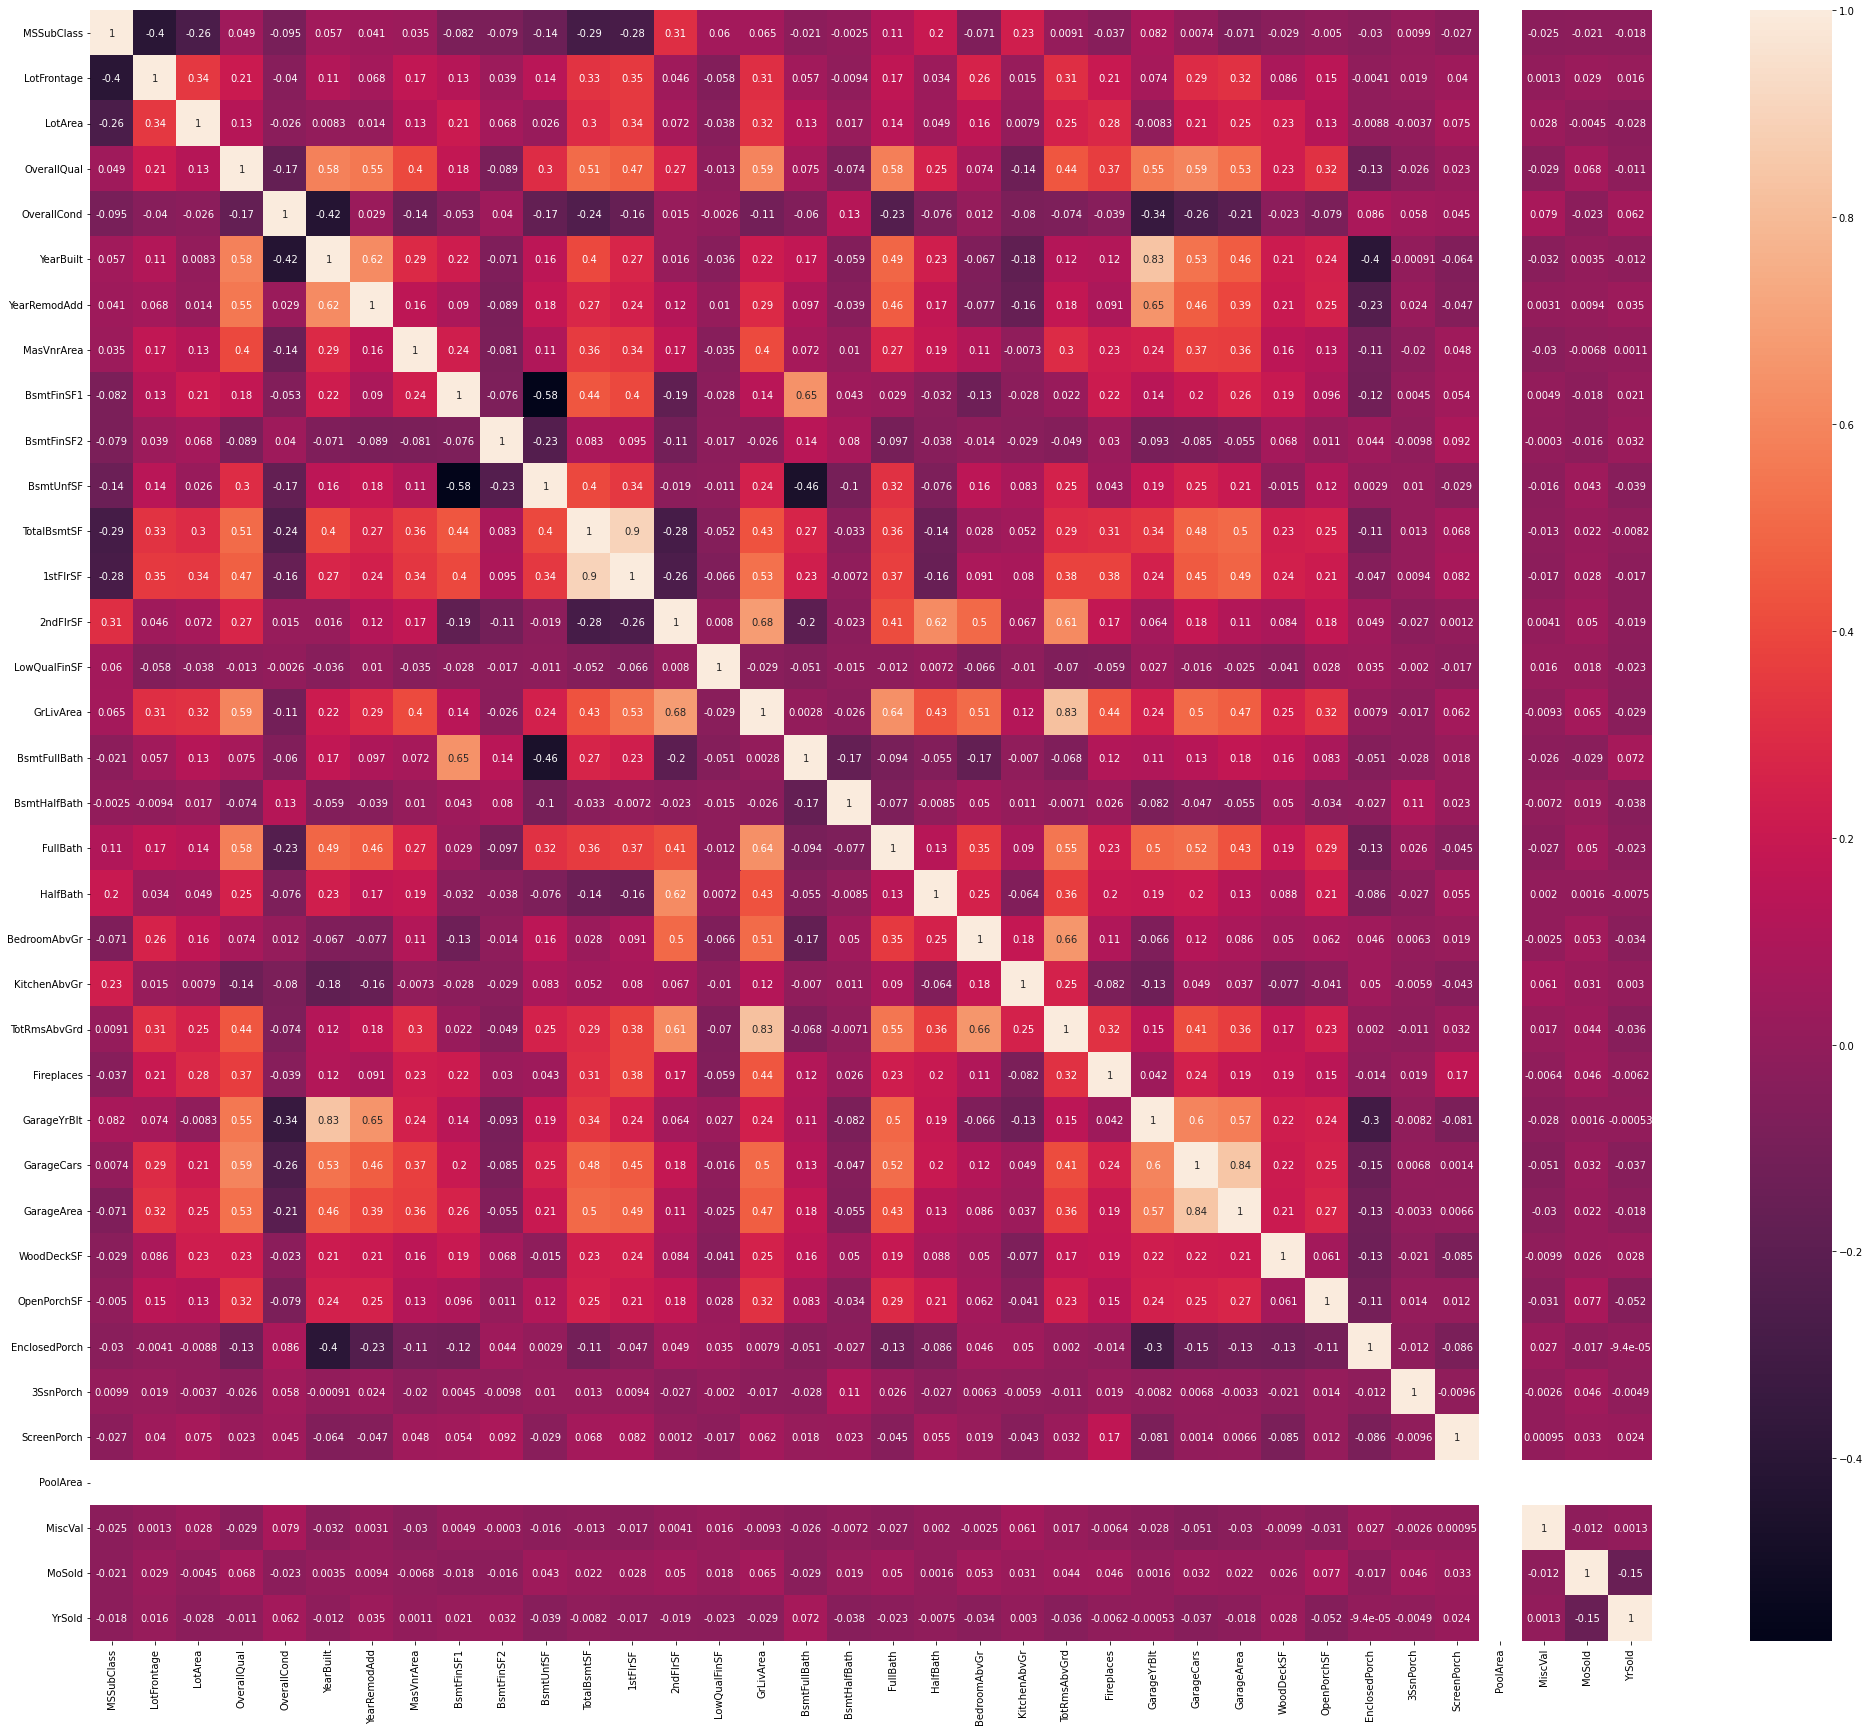

In [168]:
plt.figure(figsize=(len(numerics) - 1, 30))
sns.heatmap(corr_digit, annot=True)
plt.show()

<h2>Удалим столбцы с годами и столбец PoolArea, который не отрисовывался даже</h2>

In [169]:
data = data.drop(columns=['PoolArea', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])

<h2>Удалим столбцы из списка столбцов и разделим данные. Применим one-hot-label-encoding для категориальных признаков, которых довольно много</h2>

In [172]:
y = data['SalePrice']
numerics.remove('PoolArea')
numerics.remove('YrSold')
numerics.remove('YearBuilt')
numerics.remove('YearRemodAdd',)
numerics.remove('GarageYrBlt')
dummies = pd.get_dummies(data[categorials])
X = pd.concat([data[numerics], dummies], axis=1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No fence,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,5,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,9,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,2,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,12,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,8,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,2500,5,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,4,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<h2>Используем нормализацию числовых признаков. Здесь использован, как StandardScaler, который ориентируется на стандартное отклонение, так и MinMaxScaler, который распределяет данные от 0 до 1</h2>

In [192]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


stand_sampling_df = X.copy()
stand_sampling_df1 = X.copy()

stand_scale = StandardScaler()
g_cl_stand = stand_scale.fit_transform(stand_sampling_df[numerics])
g_cl_stand

array([[ 0.09252545, -0.25063873, -0.2813122 , ..., -0.28773346,
        -0.07837714, -1.61245237],
       [-0.87189227,  0.51258895, -0.09829213, ..., -0.28773346,
        -0.07837714, -0.49673382],
       [ 0.09252545, -0.09799319,  0.16430187, ..., -0.28773346,
        -0.07837714,  0.99089092],
       ...,
       [ 0.33362988, -0.19975688, -0.18709665, ..., -0.28773346,
         4.8169906 , -0.49673382],
       [-0.87189227, -0.09799319, -0.07967183, ..., -0.28773346,
        -0.07837714, -0.86864   ],
       [-0.87189227,  0.25817972, -0.0446593 , ..., -0.28773346,
        -0.07837714, -0.12482763]])

In [175]:
stand_sampling_df.describe()[numerics].transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1299.0,56.162433,41.491777,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1299.0,69.925897,19.660944,21.0,60.0,70.049958,79.0,182.0
LotArea,1299.0,10217.615089,6285.883973,1300.0,7692.5,9554.000000,11632.0,115149.0
OverallQual,1299.0,6.216320,1.324248,2.0,5.0,6.000000,7.0,10.0
OverallCond,1299.0,5.581216,1.070037,2.0,5.0,5.000000,6.0,9.0
MasVnrArea,1299.0,110.157415,185.272052,0.0,0.0,0.000000,173.0,1600.0
BsmtFinSF1,1299.0,458.012317,435.433501,0.0,0.0,410.000000,733.5,2260.0
BsmtFinSF2,1299.0,48.551963,165.458115,0.0,0.0,0.000000,0.0,1474.0
BsmtUnfSF,1299.0,584.785219,441.674949,0.0,249.0,488.000000,816.0,2336.0
TotalBsmtSF,1299.0,1091.349500,382.077269,105.0,820.5,1020.000000,1315.0,3200.0


In [176]:
for i in range(len(numerics)):
    stand_sampling_df.loc[:, numerics[i]] = g_cl_stand[:, i]
stand_sampling_df.describe()[numerics].transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1299.0,-8.563845e-17,1.000385,-0.871892,-0.871892,-0.148579,0.333630,3.226883
LotFrontage,1299.0,1.825586e-16,1.000385,-2.489440,-0.505048,0.006312,0.461707,5.702537
LotArea,1299.0,1.275603e-16,1.000385,-1.419220,-0.401867,-0.105613,0.225096,16.699608
OverallQual,1299.0,1.251244e-16,1.000385,-3.185163,-0.918853,-0.163416,0.592020,2.858330
OverallCond,1299.0,-2.847778e-16,1.000385,-3.348106,-0.543383,-0.543383,0.391524,3.196246
MasVnrArea,1299.0,3.726384e-17,1.000385,-0.594800,-0.594800,-0.594800,0.339321,8.044475
BsmtFinSF1,1299.0,-1.199109e-16,1.000385,-1.052259,-1.052259,-0.110306,0.632918,4.139970
BsmtFinSF2,1299.0,1.979428e-16,1.000385,-0.293553,-0.293553,-0.293553,-0.293553,8.618477
BsmtUnfSF,1299.0,1.305944e-16,1.000385,-1.324527,-0.760547,-0.219217,0.523697,3.966467
TotalBsmtSF,1299.0,1.864474e-16,1.000385,-2.582539,-0.709160,-0.186813,0.585580,5.521037


<h2>Используем линейную регрессию для предсказания цены. Сначала возьмем данные с необработанными числовыми признаками</h2>

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


estimator = LinearRegression()

estimator.fit(X, y)

y_predicted = estimator.predict(X)

print(f'MAE: {mean_absolute_error(y, y_predicted)}')
print(f'MSE: {mean_squared_error(y, y_predicted)}')
print(f'RMSE: {mean_squared_error(y, y_predicted) ** 0.5}')
print('MAPE: {}'.format(mean_absolute_percentage_error(y, y_predicted)))

MAE: 13061.990611298806
MSE: 423239955.4330487
RMSE: 20572.7964903425
MAPE: 0.07399694019093304


<h2>Далее возьмем данные с численными значениями, которые обработали с помощью  StandardScaler</h2>

In [187]:
estimator = LinearRegression()

estimator.fit(stand_sampling_df, y)

y_predicted = estimator.predict(stand_sampling_df)

print(f'MAE: {mean_absolute_error(y, y_predicted)}')
print(f'MSE: {mean_squared_error(y, y_predicted)}')
print(f'RMSE: {mean_squared_error(y, y_predicted) ** 0.5}')
print('MAPE: {}'.format(mean_absolute_percentage_error(y, y_predicted)))

MAE: 13063.493456505004
MSE: 423244706.51578134
RMSE: 20572.911960045454
MAPE: 0.07400307234406993


<h2>Далее возьмем данные с численными значениями, которые обработали с помощью MinMaxScaler</h2>

In [193]:
minmax = MinMaxScaler()
mm_dd = minmax.fit_transform(stand_sampling_df1[numerics])
mm_dd

array([[0.23529412, 0.27329193, 0.06280248, ..., 0.        , 0.        ,
        0.09090909],
       [0.        , 0.36645963, 0.07290358, ..., 0.        , 0.        ,
        0.36363636],
       [0.23529412, 0.29192547, 0.08739646, ..., 0.        , 0.        ,
        0.72727273],
       ...,
       [0.29411765, 0.27950311, 0.06800235, ..., 0.        , 0.16129032,
        0.36363636],
       [0.        , 0.29192547, 0.07393126, ..., 0.        , 0.        ,
        0.27272727],
       [0.        , 0.33540373, 0.07586364, ..., 0.        , 0.        ,
        0.45454545]])

In [194]:
for i in range(len(numerics)):
    stand_sampling_df1.loc[:, numerics[i]] = mm_dd[:, i]
stand_sampling_df1.describe()[numerics].transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1299.0,0.212720,0.244069,0.0,0.000000,0.176471,0.294118,1.0
LotFrontage,1299.0,0.303888,0.122118,0.0,0.242236,0.304658,0.360248,1.0
LotArea,1299.0,0.078328,0.055212,0.0,0.056149,0.072500,0.090752,1.0
OverallQual,1299.0,0.527040,0.165531,0.0,0.375000,0.500000,0.625000,1.0
OverallCond,1299.0,0.511602,0.152862,0.0,0.428571,0.428571,0.571429,1.0
MasVnrArea,1299.0,0.068848,0.115795,0.0,0.000000,0.000000,0.108125,1.0
BsmtFinSF1,1299.0,0.202660,0.192670,0.0,0.000000,0.181416,0.324558,1.0
BsmtFinSF2,1299.0,0.032939,0.112251,0.0,0.000000,0.000000,0.000000,1.0
BsmtUnfSF,1299.0,0.250336,0.189073,0.0,0.106592,0.208904,0.349315,1.0
TotalBsmtSF,1299.0,0.318691,0.123450,0.0,0.231179,0.295638,0.390953,1.0


In [195]:
estimator = LinearRegression()

estimator.fit(stand_sampling_df1, y)

y_predicted = estimator.predict(stand_sampling_df1)

print(f'MAE: {mean_absolute_error(y, y_predicted)}')
print(f'MSE: {mean_squared_error(y, y_predicted)}')
print(f'RMSE: {mean_squared_error(y, y_predicted) ** 0.5}')
print('MAPE: {}'.format(mean_absolute_percentage_error(y, y_predicted)))

MAE: 13062.906081601232
MSE: 423246922.5673595
RMSE: 20572.965818456014
MAPE: 0.07400120012416826


<h2>Вывод</h2>
<p>Линейная регрессия работает почти одинаково(в пределах погрешности) како значениями, обработанными с StandardScaler, так и со значениями, обработанными с MinMaxScaler</p>